In [1]:
import comparer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [2]:
# Load table from file (placeholder with a handful of records for now) 
file_path = "../Datasets/ImpactDB_DataTable_Windstorms_v2.xlsx"
table = pd.read_excel(file_path, dtype="str").replace({np.nan: None})
table

,Event_ID,Event_Type,Source,Event_Name,Location,Single_Date,Start_Date,End_Date,Total_Deaths,Num_Injured,...,Total_Affected,Insured_Damage,Insured_Damage_Units,Insured_Damage_Inflation_Adjusted,Insured_Damage_Inflation_Adjusted_Year,Total_Damage,Total_Damage_Units,Total_Damage_Inflation_Adjusted,Total_Damage_Inflation_Adjusted_Year,Buildings_Damaged
0,1,windstorm,https://www.artemis.bm/news/perils-puts-initia...,Kyrill,France|Germany|Poland|Belgium,None,1999-12-03 00:00:00,1999-12-04 00:00:00,24,130,...,199,50000000,USD,Yes,2012,100000000,USD,Yes,2012,567
1,2,windstorm,https://www.artemis.bm/news/perils-puts-initia...,Joachim,France|Germany|Poland,2011-12-15 00:00:00,2011-12-15 00:00:00,2011-12-17 00:00:00,60,60,...,132,67000000,USD,No,None,300000000,USD,No,None,None
2,2.1,windstorm,https://en.wikipedia.org/wiki?curid=72304447,Joachim,France|Germany|Poland,2011-12-15 00:00:00,2011-12-15 00:00:00,2011-12-17 00:00:00,None,None,...,None,None,None,None,None,None,None,None,None,131
3,2.2,windstorm,https://www.artemis.bm/news/perils-puts-initia...,Joachim,France,2011-12-15 00:00:00,None,None,11,None,...,None,None,None,None,None,None,None,None,None,None
4,2.3,windstorm,https://en.wikipedia.org/wiki?curid=72304447,Joachim,Normandy&France,2011-12-15 00:00:00,None,None,None,25,...,None,None,None,None,None,None,None,None,None,None
5,2.4,windstorm,https://www.artemis.bm/news/perils-puts-initia...,Joachim,Germany,2011-12-16 00:00:00,None,None,25,None,...,None,None,None,None,None,None,None,None,None,None
6,2.5,windstorm,JRC133185,Joachim,Germany,2011-12-16 00:00:00,None,None,None,None,...,None,35000000,USD,Yes,2020,None,None,None,None,None
7,3,windstorm,https://www.artemis.bm/news/perils-puts-initia...,Xaver,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [3]:
# Specify item weights
weights = {
         "Event_Type": 0,
         "Event_Name": 1,
         "Insured_Damage_Units": 1,
         "Total_Damage_Units": 1,
         "Location": 1,
         "Single_Date": 1,
         "Start_Date": 1,
         "End_Date": 1,
         "Total_Deaths": 1,
         "Num_Injured": 1,
         "Displaced_People": 1,
         "Num_Homeless": 1,
         "Total_Affected": 1,
         "Insured_Damage": 1,
         "Insured_Damage_Inflation_Adjusted_Year": 1,
         "Total_Damage": 1,
         "Total_Damage_Inflation_Adjusted_Year": 1,
         "Buildings_Damaged": 1,
         "Insured_Damage_Inflation_Adjusted": 1,
         "Total_Damage_Inflation_Adjusted": 1}

# Instantiate comparer
comp = comparer.Comparer()
# Convert to list of dictionaries
events = table.to_dict('records')
# Compare all pairs of events
pairs = itertools.combinations(events, 2)
comps = [[v["Event_ID"], w["Event_ID"], comp.weighted(v, w, weights), comp.all(v, w)] for (v, w) in pairs]
all_comps = pd.DataFrame([[i, j, c, d] + list(a.values()) for [i, j, (c, d), a] in comps], 
                         columns=["Event_ID1", "Event_ID2", "Coverage", "Weighted_Score"] + 
                         list(weights.keys())).replace({np.nan: None})
all_comps

,Event_ID1,Event_ID2,Coverage,Weighted_Score,Event_Type,Event_Name,Insured_Damage_Units,Total_Damage_Units,Location,Single_Date,...,Displaced_People,Num_Homeless,Total_Affected,Insured_Damage,Insured_Damage_Inflation_Adjusted_Year,Total_Damage,Total_Damage_Inflation_Adjusted_Year,Buildings_Damaged,Insured_Damage_Inflation_Adjusted,Total_Damage_Inflation_Adjusted
0,1,2,0.210526,0.579647,0,1,0.0,0.0,0.25,None,...,0.8,1.0,0.202417,0.145299,None,0.5,None,None,1.0,1.0
1,1,2.1,0.736842,0.774928,0,1,None,None,0.25,None,...,None,None,None,None,None,None,None,0.624642,None,None
2,1,2.2,0.842105,0.707143,0,1,None,None,0.75,None,...,None,None,None,None,None,None,None,None,None,None
3,1,2.3,0.842105,0.825806,0,1,None,None,0.8,None,...,None,None,None,None,None,None,None,None,None,None
4,1,2.4,0.842105,0.590136,0,1,None,None,0.75,None,...,None,None,None,None,None,None,None,None,None,None
5,1,2.5,0.684211,0.321409,0,1,0.0,None,0.75,None,...,None,None,None,0.176471,0.001984,None,None,None,0.0,None
6,1,3,0.947368,1.0,0,1,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,2,2.1,0.736842,0.0,0,0,None,None,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
8,2,2.2,0.789474,0.339202,0,0,None,None,0.666667,0.0,...,None,None,None,None,None,None,None,None,None,None
9,2,2.3,0.789474,0.290441,0,0,None,None,0.75,0.0,...,None,None,None,None,None,None,None,None,None,None


In [4]:
# Print sorted by weighted score
all_comps.sort_values("Weighted_Score")

,Event_ID1,Event_ID2,Coverage,Weighted_Score,Event_Type,Event_Name,Insured_Damage_Units,Total_Damage_Units,Location,Single_Date,...,Displaced_People,Num_Homeless,Total_Affected,Insured_Damage,Insured_Damage_Inflation_Adjusted_Year,Total_Damage,Total_Damage_Inflation_Adjusted_Year,Buildings_Damaged,Insured_Damage_Inflation_Adjusted,Total_Damage_Inflation_Adjusted
25,2.4,2.5,0.842105,0.0,0,0,None,None,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
7,2,2.1,0.736842,0.0,0,0,None,None,0.0,0.0,...,None,None,None,None,None,None,None,None,None,None
18,2.2,2.3,0.842105,0.166667,0,0,None,None,0.5,0.0,...,None,None,None,None,None,None,None,None,None,None
13,2.1,2.2,0.842105,0.222222,0,0,None,None,0.666667,0.0,...,None,None,None,None,None,None,None,None,None,None
14,2.1,2.3,0.842105,0.25,0,0,None,None,0.75,0.0,...,None,None,None,None,None,None,None,None,None,None
9,2,2.3,0.789474,0.290441,0,0,None,None,0.75,0.0,...,None,None,None,None,None,None,None,None,None,None
5,1,2.5,0.684211,0.321409,0,1,0.0,None,0.75,None,...,None,None,None,0.176471,0.001984,None,None,None,0.0,None
8,2,2.2,0.789474,0.339202,0,0,None,None,0.666667,0.0,...,None,None,None,None,None,None,None,None,None,None
11,2,2.5,0.684211,0.496732,0,0,0.0,None,0.666667,1.0,...,None,None,None,0.313725,None,None,None,None,1.0,None
10,2,2.4,0.789474,0.519608,0,0,None,None,0.666667,1.0,...,None,None,None,None,None,None,None,None,None,None


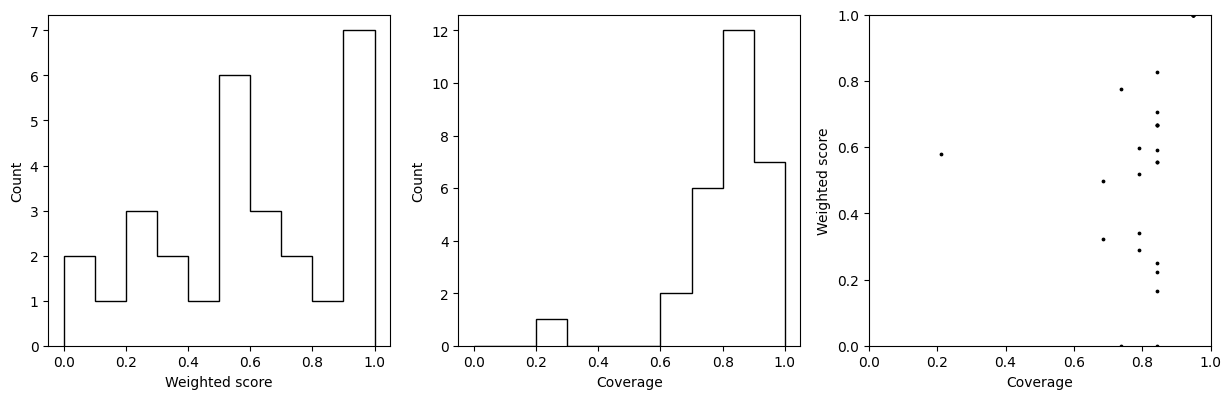

In [5]:
# Plot histograms and scatter plots of weighted scores and coverages
def plot_hist(c, l, a):
    all_comps.plot.hist(column=[c], bins=10, color="Black", legend=False, 
                        xlabel=l, ylabel="Count", histtype="step", ax=axes[a])

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4.3))
plot_hist("Weighted_Score", "Weighted score", 0)
plot_hist("Coverage", "Coverage", 1)
p = all_comps.plot.scatter(x="Coverage", y="Weighted_Score", c="Black", s=3, xlim=(0, 1), ylim=(0, 1), 
                           xlabel="Coverage", ylabel="Weighted score", ax=axes[2])

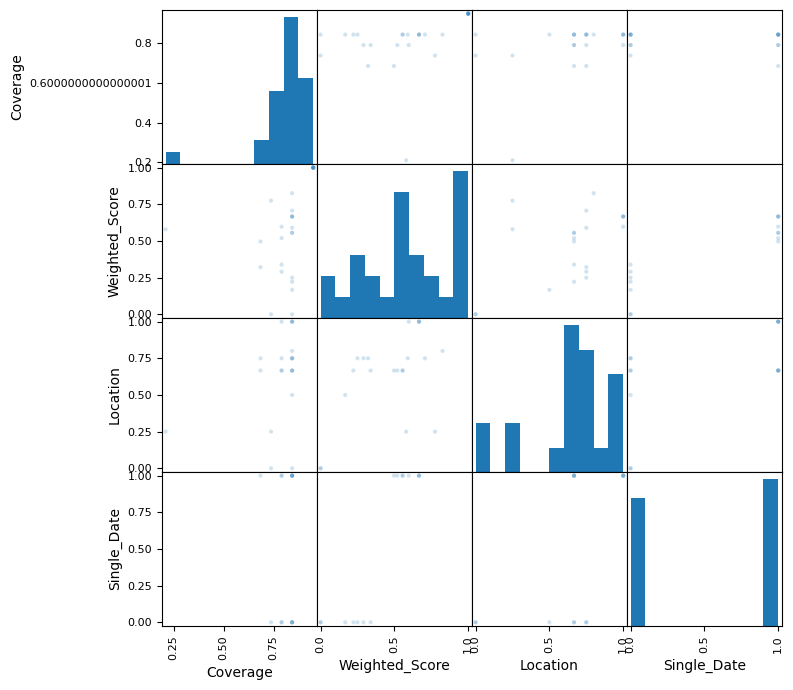

In [6]:
# Plot histograms and pairwise scatter plots for selected fields
fields = ["Coverage", "Weighted_Score", "Location", "Single_Date"]
p = pd.plotting.scatter_matrix(all_comps[fields].convert_dtypes(), alpha=0.2, figsize=(8, 8))